In [18]:
#!pip install sentence-transformers
#!pip install matplotlib
#!pip install pandas
#!pip install plotly
#!pip install nbformat
#!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [7]:
import pandas as pd

# Load the CSV file
file_path = "INBIOV2 direct parent.csv"
data = pd.read_csv(file_path)

# Fill missing parent definitions with parent comments
data['parentDefinition'] = data['parentDefinition'].fillna(data['parentComment'])

# Combine concept definitions with parent information
def combine_definition(row):
    concept_definition = row['classDefinition'] if pd.notna(row['classDefinition']) else row['classComment']
    parent_info = f" Parent concept: {row['parentLabel']}. Parent definition: {row['parentDefinition']}."
    return f"{concept_definition}{parent_info}"

data['combinedDefinition'] = data.apply(combine_definition, axis=1)

In [8]:
from sentence_transformers import SentenceTransformer

# Load the embedding model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Generate embeddings for each concept using combined definitions
embeddings = {}
for _, row in data.iterrows():
    concept = row['classLabel']
    combined_definition = row['combinedDefinition']
    embedding = model.encode(combined_definition)
    embeddings[concept] = embedding


In [9]:
import pickle

output_file = "refined_ontology_embeddings.pkl"
with open(output_file, "wb") as f:
    pickle.dump(embeddings, f)

print(f"Refined embeddings saved to {output_file}")



Refined embeddings saved to refined_ontology_embeddings.pkl


In [12]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import plotly.express as px

# Step 1: Load and Process the Data
file_path = "INBIOV2 direct parent.csv"
data = pd.read_csv(file_path)

# Fill missing parent definitions with parent comments
data['parentDefinition'] = data['parentDefinition'].fillna(data['parentComment'])

# Combine concept definitions with parent information
def combine_definition(row):
    concept_definition = row['classDefinition'] if pd.notna(row['classDefinition']) else row['classComment']
    parent_info = f" Parent concept: {row['parentLabel']}. Parent definition: {row['parentDefinition']}."
    return f"{concept_definition}{parent_info}"

data['combinedDefinition'] = data.apply(combine_definition, axis=1)

# Step 2: Generate Refined Embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

embeddings = []
concepts = []
for _, row in data.iterrows():
    concept = row['classLabel']
    combined_definition = row['combinedDefinition']
    embedding = model.encode(combined_definition)
    embeddings.append(embedding)
    concepts.append(concept)

# Convert embeddings to a NumPy array
embedding_matrix = np.array(embeddings)

# Step 3: Reduce Dimensions with t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embedding_matrix)

# Step 4: Prepare Data for Plotly
embedding_df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
embedding_df["concept"] = concepts
embedding_df["parent"] = data["parentLabel"]

# Step 5: Create an Interactive Plotly Visualization
fig = px.scatter(
    embedding_df,
    x="x",
    y="y",
    text="concept",
    color="parent",  # Color points by parent concept
    title="Refined Concept Embeddings Visualization",
    labels={"x": "Dimension 1", "y": "Dimension 2", "color": "Parent Concept"}
)

# Enhance text visibility
fig.update_traces(textposition="top center", marker=dict(size=8))

# Show the interactive plot
fig.show()


In [14]:
import pickle
from sklearn.metrics.pairwise import cosine_similarity

# Load the embeddings
with open("ontology_embeddings.pkl", "rb") as f:
    embeddings_concept_only = pickle.load(f)

with open("refined_ontology_embeddings.pkl", "rb") as f:
    embeddings_with_parent = pickle.load(f)

# Compute cosine similarity for each concept
cosine_similarities = {}
for concept in embeddings_concept_only.keys():
    vec1 = embeddings_concept_only[concept]
    vec2 = embeddings_with_parent[concept]
    similarity = cosine_similarity([vec1], [vec2])[0][0]
    cosine_similarities[concept] = similarity

# Sort concepts by similarity
sorted_similarities = sorted(cosine_similarities.items(), key=lambda x: x[1], reverse=True)

# Display top concepts
print("Top 5 concepts with highest similarity:")
for concept, similarity in sorted_similarities[:5]:
    print(f"{concept}: {similarity:.4f}")

print("\nTop 5 concepts with lowest similarity:")
for concept, similarity in sorted_similarities[-5:]:
    print(f"{concept}: {similarity:.4f}")


Top 5 concepts with highest similarity:
generalist herbivore: 0.9750
invasion pattern: 0.9717
mineral material: 0.9714
species number: 0.9696
invasion ecology: 0.9682

Top 5 concepts with lowest similarity:
body of water: 0.4232
water body: 0.4232
resistance: 0.3266
width: 0.2874
perimeter: 0.2181


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract concept names and similarity scores
concepts, similarities = zip(*cosine_similarities.items())

# Step 2: Plot Histogram of Similarity Scores
plt.figure(figsize=(10, 6))
sns.histplot(similarities, bins=30, kde=True, color='blue')
plt.title("Distribution of Cosine Similarity Scores", fontsize=16)
plt.xlabel("Cosine Similarity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

# Step 3: Scatter Plot of Concepts vs Similarity Scores
plt.figure(figsize=(12, 6))
plt.scatter(range(len(similarities)), similarities, c="blue", alpha=0.6)
plt.title("Cosine Similarity Scores for Concepts", fontsize=16)
plt.xlabel("Concept Index", fontsize=12)
plt.ylabel("Cosine Similarity", fontsize=12)
plt.grid(True)

# Highlight top 5 highest and lowest similarity concepts
for i in range(5):
    # Highest similarities
    plt.text(
        sorted_similarities[i][0],
        sorted_similarities[i][1],
    )
)


SyntaxError: unmatched ')' (2126346592.py, line 31)

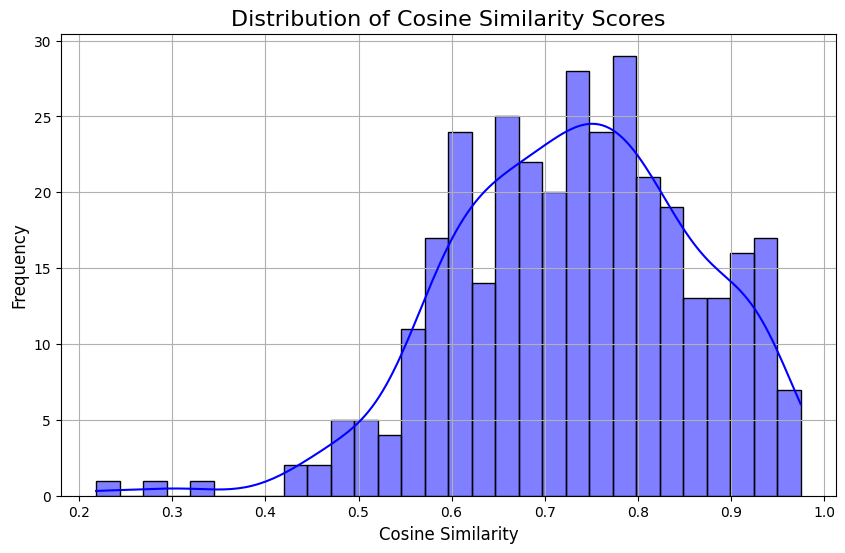

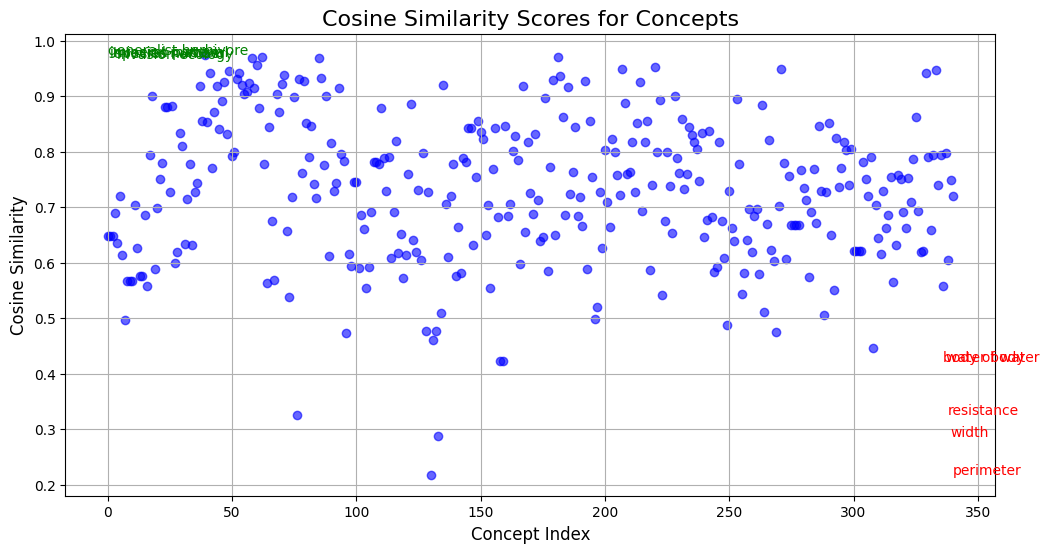

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract concept names and similarity scores
concepts, similarities = zip(*cosine_similarities.items())

# Step 2: Plot Histogram of Similarity Scores
plt.figure(figsize=(10, 6))
sns.histplot(similarities, bins=30, kde=True, color='blue')
plt.title("Distribution of Cosine Similarity Scores", fontsize=16)
plt.xlabel("Cosine Similarity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

# Step 3: Scatter Plot of Concepts vs Similarity Scores
plt.figure(figsize=(12, 6))
plt.scatter(range(len(similarities)), similarities, c="blue", alpha=0.6)
plt.title("Cosine Similarity Scores for Concepts", fontsize=16)
plt.xlabel("Concept Index", fontsize=12)
plt.ylabel("Cosine Similarity", fontsize=12)
plt.grid(True)

# Highlight top 5 highest and lowest similarity concepts
for i in range(5):
    # Highest similarities
    plt.text(i, sorted_similarities[i][1], sorted_similarities[i][0], fontsize=10, color="green")
    # Lowest similarities
    plt.text(len(sorted_similarities) - 1 - i, sorted_similarities[-1 - i][1], sorted_similarities[-1 - i][0], fontsize=10, color="red")

plt.show()
